### Import Lıbrarıes

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [2]:
# read the data
data = pd.read_csv("../dataset/network_anomaly_detection/all_data (3).csv")

In [3]:
data.head()

,ifInOctets11,ifOutOctets11,ifoutDiscards11,ifInUcastPkts11,ifInNUcastPkts11,ifInDiscards11,ifOutUcastPkts11,ifOutNUcastPkts11,tcpOutRsts,tcpInSegs,...,ipForwDatagrams,ipOutNoRoutes,ipInAddrErrors,icmpInMsgs,icmpInDestUnreachs,icmpOutMsgs,icmpOutDestUnreachs,icmpInEchos,icmpOutEchoReps,class
0,1867925250,902237363,0,52007310,16978,0,7197292,3968,1,682,...,59244345,7,0,49,26,46,23,23,23,normal
1,1994338334,903845459,0,52098054,16986,0,7227073,3968,1,682,...,59387381,7,0,49,26,46,23,23,23,normal
2,2116573334,905396546,0,52185853,16994,0,7255792,3969,1,682,...,59498140,7,0,49,26,46,23,23,23,normal
3,2257767832,907308930,0,52287097,17015,0,7291152,3975,1,701,...,59581345,7,0,51,27,47,23,24,24,normal
4,2342047724,908534112,0,52347521,17043,0,7313830,3977,1,709,...,59664453,7,0,51,27,47,23,24,24,normal


In [4]:
data.tail()

,ifInOctets11,ifOutOctets11,ifoutDiscards11,ifInUcastPkts11,ifInNUcastPkts11,ifInDiscards11,ifOutUcastPkts11,ifOutNUcastPkts11,tcpOutRsts,tcpInSegs,...,ipForwDatagrams,ipOutNoRoutes,ipInAddrErrors,icmpInMsgs,icmpInDestUnreachs,icmpOutMsgs,icmpOutDestUnreachs,icmpInEchos,icmpOutEchoReps,class
4993,920339242,1018698274,196630,232126269,33563,196630,88324107,7909,4,195,...,320650676,7,62,12,11,13,12,1,1,bruteForce
4994,1076668546,1052551068,196630,232495471,33625,196630,88517118,7909,4,195,...,321086699,7,62,12,11,13,12,1,1,bruteForce
4995,1198225505,1078899810,196630,232782747,33654,196630,88667318,7909,4,195,...,321527315,7,62,12,11,13,12,1,1,bruteForce
4996,1294035181,1099681738,196630,233009258,33675,196630,88785793,7909,4,195,...,321966810,7,62,12,11,13,12,1,1,bruteForce
4997,1387479040,1119990576,196630,233230512,33692,196630,88979346,7909,4,195,...,322409479,7,62,12,11,13,12,1,1,bruteForce


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ifInOctets11         4998 non-null   int64 
 1   ifOutOctets11        4998 non-null   int64 
 2   ifoutDiscards11      4998 non-null   int64 
 3   ifInUcastPkts11      4998 non-null   int64 
 4   ifInNUcastPkts11     4998 non-null   int64 
 5   ifInDiscards11       4998 non-null   int64 
 6   ifOutUcastPkts11     4998 non-null   int64 
 7   ifOutNUcastPkts11    4998 non-null   int64 
 8   tcpOutRsts           4998 non-null   int64 
 9   tcpInSegs            4998 non-null   int64 
 10  tcpOutSegs           4998 non-null   int64 
 11  tcpPassiveOpens      4998 non-null   int64 
 12  tcpRetransSegs       4998 non-null   int64 
 13  tcpCurrEstab         4998 non-null   int64 
 14  tcpEstabResets       4998 non-null   int64 
 15  tcp?ActiveOpens      4998 non-null   int64 
 16  udpInD

In [6]:
# describe and null control
data.describe()

,ifInOctets11,ifOutOctets11,ifoutDiscards11,ifInUcastPkts11,ifInNUcastPkts11,ifInDiscards11,ifOutUcastPkts11,ifOutNUcastPkts11,tcpOutRsts,tcpInSegs,...,ipInDiscards,ipForwDatagrams,ipOutNoRoutes,ipInAddrErrors,icmpInMsgs,icmpInDestUnreachs,icmpOutMsgs,icmpOutDestUnreachs,icmpInEchos,icmpOutEchoReps
count,4.998000e+03,4.998000e+03,4998.000000,4.998000e+03,4998.000000,4998.000000,4.998000e+03,4998.000000,4998.000000,4998.000000,...,4998.000000,4.998000e+03,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000
mean,2.161260e+09,1.281552e+09,36377.437975,9.150696e+07,20425.803922,36377.561825,2.680787e+07,4967.060624,2.393557,804.509004,...,31.603241,1.183485e+08,4.448980,34.515606,50.362345,27.724490,34.803922,12.165866,22.638055,22.638055
std,1.233852e+09,1.153395e+09,74228.977904,5.800683e+07,7936.895813,74228.989718,2.328438e+07,1784.778092,1.086869,570.224711,...,12.208877,8.013439e+07,3.030579,24.954240,37.036257,18.863781,20.826411,9.237202,18.481888,18.481888
min,1.426588e+06,1.618430e+05,0.000000,7.013690e+05,2735.000000,0.000000,2.230760e+05,796.000000,1.000000,55.000000,...,9.000000,9.874700e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.094045e+09,3.724623e+08,0.000000,5.020809e+07,15081.000000,0.000000,8.049108e+06,3799.250000,2.000000,195.000000,...,23.000000,5.991003e+07,0.000000,6.000000,12.000000,11.000000,13.000000,1.000000,1.000000,1.000000
50%,2.180395e+09,8.935678e+08,0.000000,7.906267e+07,20987.000000,0.000000,1.745086e+07,5089.000000,2.000000,817.000000,...,37.000000,9.806338e+07,5.000000,42.000000,55.000000,29.000000,34.000000,12.000000,26.000000,26.000000
75%,3.221204e+09,2.448435e+09,4216.000000,1.313896e+08,26931.000000,4216.000000,4.038847e+07,6383.000000,4.000000,1286.000000,...,39.000000,1.774026e+08,7.000000,61.000000,83.750000,44.000000,49.000000,21.000000,38.000000,38.000000
max,4.294416e+09,4.294061e+09,196630.000000,2.439828e+08,35238.000000,196630.000000,9.369831e+07,8311.000000,4.000000,1945.000000,...,58.000000,3.376958e+08,7.000000,62.000000,127.000000,68.000000,85.000000,23.000000,64.000000,64.000000


In [7]:
data.isna().sum()

ifInOctets11           0
ifOutOctets11          0
ifoutDiscards11        0
ifInUcastPkts11        0
ifInNUcastPkts11       0
ifInDiscards11         0
ifOutUcastPkts11       0
ifOutNUcastPkts11      0
tcpOutRsts             0
tcpInSegs              0
tcpOutSegs             0
tcpPassiveOpens        0
tcpRetransSegs         0
tcpCurrEstab           0
tcpEstabResets         0
tcp?ActiveOpens        0
udpInDatagrams         0
udpOutDatagrams        0
udpInErrors            0
udpNoPorts             0
ipInReceives           0
ipInDelivers           0
ipOutRequests          0
ipOutDiscards          0
ipInDiscards           0
ipForwDatagrams        0
ipOutNoRoutes          0
ipInAddrErrors         0
icmpInMsgs             0
icmpInDestUnreachs     0
icmpOutMsgs            0
icmpOutDestUnreachs    0
icmpInEchos            0
icmpOutEchoReps        0
class                  0
dtype: int64

In [8]:
data.duplicated().sum()

0

<Axes: xlabel='class', ylabel='count'>

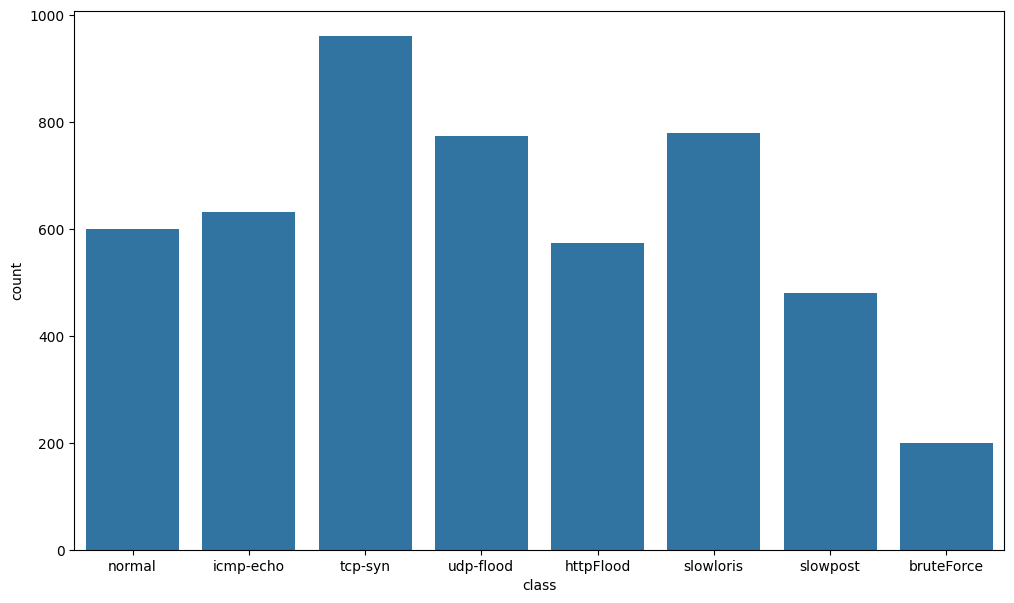

In [10]:
# lets check the data EDA
plt.figure(figsize=(12, 7))
sns.countplot(data=data, x="class")

In [20]:
# data label transform
process_data = data.copy()

In [24]:
encoder = LabelEncoder()
process_data["class"] = encoder.fit_transform(process_data["class"])


In [28]:
process_data["class"].value_counts()

class
6    960
4    780
7    773
2    632
3    600
1    573
5    480
0    200
Name: count, dtype: int64

<Axes: >

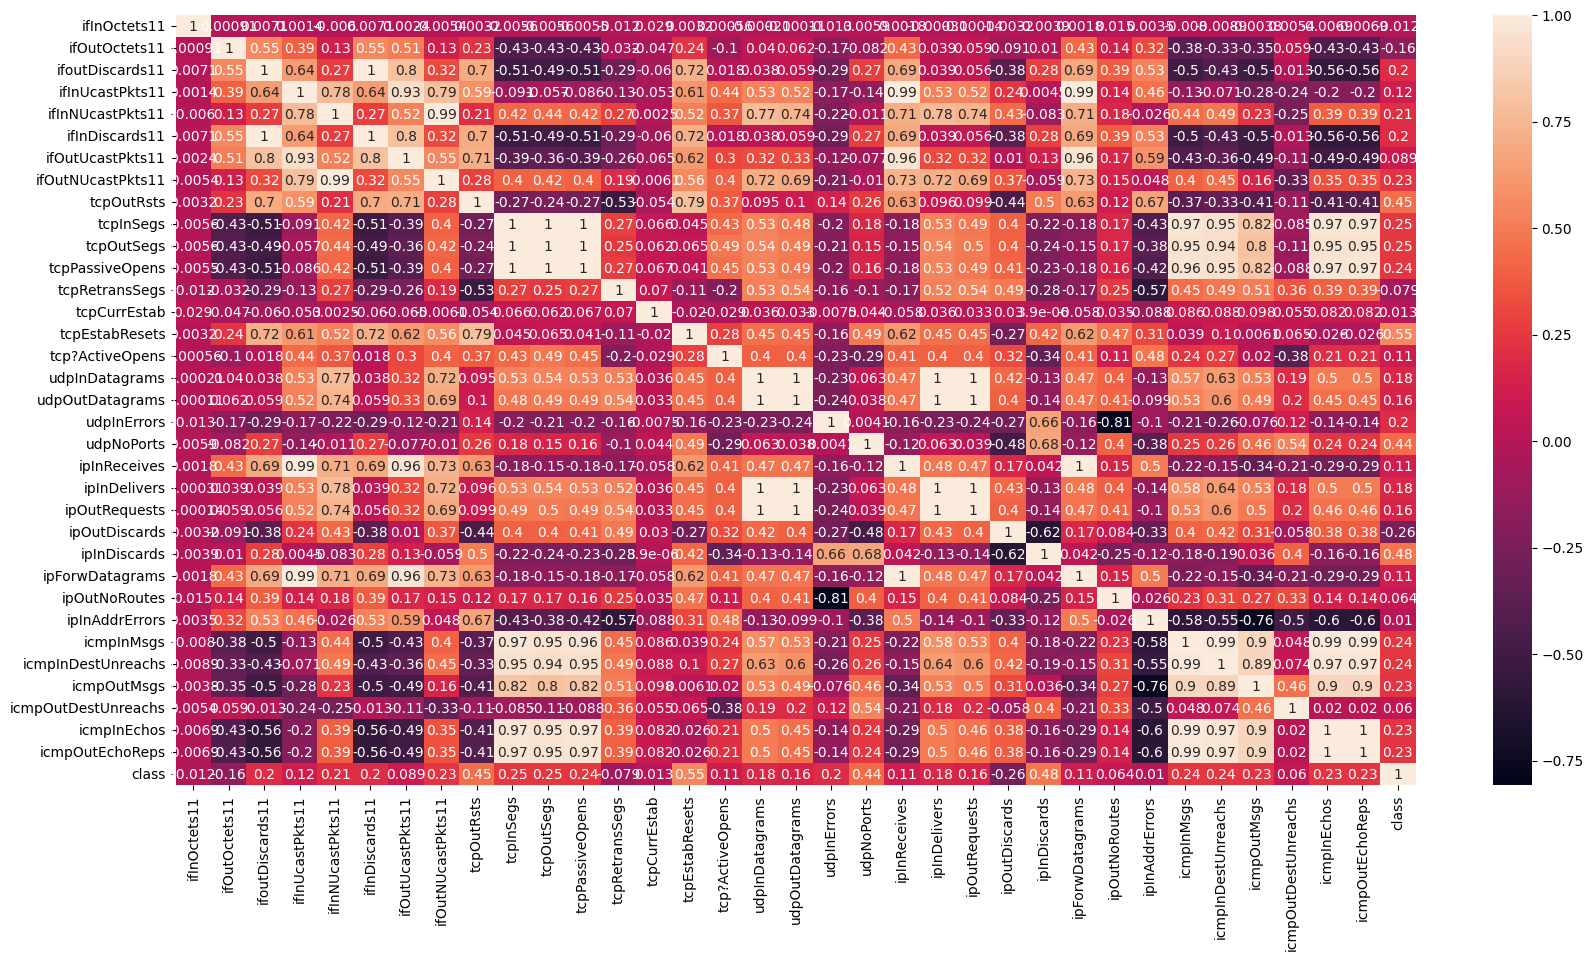

In [32]:
# correlation
plt.figure(figsize=(20, 10))
sns.heatmap(process_data.corr(), annot=True)

In [43]:
# box plots for high corellation 
process_data.corr()["class"].sort_values(ascending=False)
columns = ["tcpEstabResets", "ipInDiscards", "tcpOutRsts"]

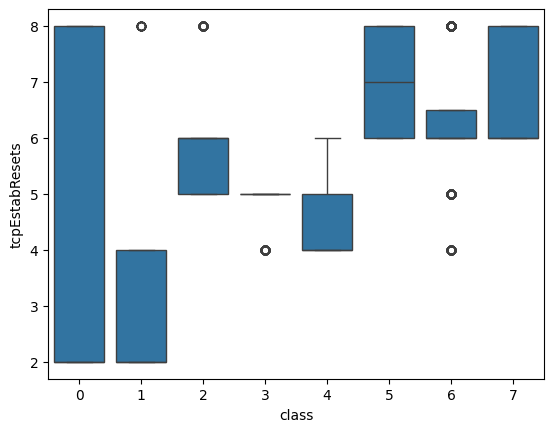

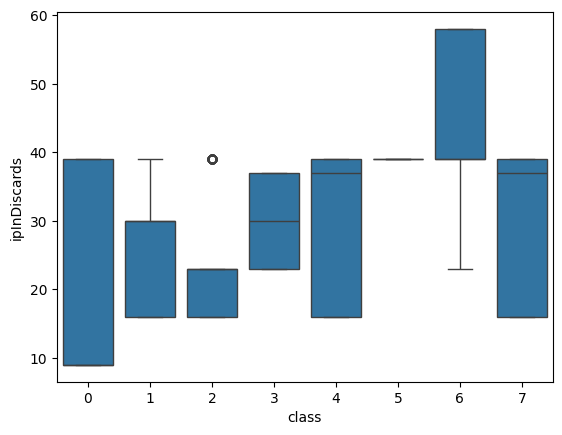

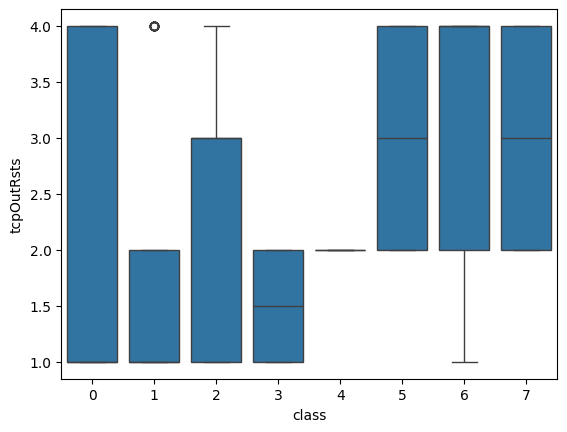

In [42]:
for i in columns:
    sns.boxplot(data=process_data, x="class", y=i)
    plt.show()

In [44]:
process_data.shape

(4998, 35)

In [92]:
scaler = MinMaxScaler()
sclaed_to_autoencoder = scaler.fit_transform(process_data.iloc[:, :-1])

In [100]:
# principle component analysis with autoencoder
from keras.layers import Dense, Input
from keras.models import Sequential

# encoder
encoder = Sequential()
encoder.add(Input(shape=(34, )))
encoder.add(Dense(34, activation="relu"))
encoder.add(Dense(17, activation="relu"))
encoder.add(Dense(10, activation="relu"))

In [101]:
decoder = Sequential()
encoder.add(Dense(17, activation="relu"))
decoder.add(Dense(34, activation="relu"))

In [102]:
# autoencoder
autoencoder = Sequential([encoder, decoder])

In [103]:
autoencoder.compile(loss="mse", optimizer="rmsprop", metrics=["mae"])

In [104]:
autoencoder.fit(sclaed_to_autoencoder, sclaed_to_autoencoder, epochs=20)

Epoch 1/20
157/157 [==============================] - 1s 2ms/step - loss: 0.1596 - mae: 0.2934
Epoch 2/20
157/157 [==============================] - 0s 2ms/step - loss: 0.1051 - mae: 0.2131
Epoch 3/20
157/157 [==============================] - 0s 2ms/step - loss: 0.0508 - mae: 0.1395
Epoch 4/20
157/157 [==============================] - 0s 2ms/step - loss: 0.0352 - mae: 0.1089
Epoch 5/20
157/157 [==============================] - 0s 2ms/step - loss: 0.0309 - mae: 0.0952
Epoch 6/20
157/157 [==============================] - 0s 2ms/step - loss: 0.0287 - mae: 0.0854
Epoch 7/20
157/157 [==============================] - 0s 2ms/step - loss: 0.0279 - mae: 0.0802
Epoch 8/20
157/157 [==============================] - 0s 2ms/step - loss: 0.0261 - mae: 0.0773
Epoch 9/20
157/157 [==============================] - 0s 2ms/step - loss: 0.0252 - mae: 0.0744
Epoch 10/20
157/157 [==============================] - 0s 2ms/step - loss: 0.0240 - mae: 0.0717
Epoch 11/20
157/157 [============================

In [110]:
selected = np.argsort(autoencoder.predict(sclaed_to_autoencoder)[0])

157/157 [==============================] - 0s 1ms/step


In [111]:
process_data.iloc[1, selected], process_data.corr()["class"].sort_values(ascending=False)

(tcpOutRsts                      1
 ipInReceives             59444220
 tcpCurrEstab                    0
 ipOutDiscards                 569
 tcp?ActiveOpens                 3
 udpInErrors                     1
 ifoutDiscards11                 0
 ifOutOctets11           903845459
 ifInDiscards11                  0
 ipInAddrErrors                  0
 ifOutUcastPkts11          7227073
 ipForwDatagrams          59387381
 ifInUcastPkts11          52098054
 ipInDiscards                   23
 tcpPassiveOpens                49
 tcpOutSegs                    537
 tcpInSegs                     682
 icmpOutEchoReps                23
 tcpEstabResets                  5
 icmpInEchos                    23
 icmpInMsgs                     49
 ifOutNUcastPkts11            3968
 icmpInDestUnreachs             26
 ifInNUcastPkts11            16986
 icmpOutMsgs                    46
 ifInOctets11           1994338334
 ipOutRequests              187952
 udpOutDatagrams            187347
 tcpRetransSegs     

In [140]:
# new data to train model
new_data = pd.concat([process_data.iloc[:, selected[:10]], process_data.iloc[:, -1]], axis=1)

In [141]:
new_data.shape

(4998, 11)

In [142]:
# machine learning section

In [143]:
X = new_data.iloc[:, :-1].values
y = new_data.iloc[:, -1].values

In [144]:
X.shape

(4998, 10)

In [145]:
y.shape

(4998,)

In [183]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [184]:
X_train.shape, y_train.shape

((3998, 10), (3998,))

In [185]:
X_test.shape, y_test.shape

((1000, 10), (1000,))

In [186]:
# minmax scale
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

In [187]:
X_test = scaler.fit_transform(X_test)

In [188]:
from sklearn.metrics import classification_report
# classification report function
def report(model):
    predicted = model.predict(X_test)
    print(classification_report(y_test, predicted))

### KNN

In [189]:
knn = KNeighborsClassifier(n_jobs=4, n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=4, n_neighbors=3)

In [190]:
report(knn)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      0.98      0.99        98
           2       1.00      1.00      1.00       130
           3       1.00      1.00      1.00       134
           4       0.99      1.00      0.99       160
           5       1.00      0.99      0.99        99
           6       0.99      1.00      1.00       190
           7       0.99      0.99      0.99       152

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



### Random Forests

In [191]:
# Random forest
rf = RandomForestClassifier(n_estimators=10, max_depth=4, n_jobs=4)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=10, n_jobs=4)

In [192]:
report(rf)

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        37
           1       1.00      0.95      0.97        98
           2       0.94      0.94      0.94       130
           3       0.98      1.00      0.99       134
           4       0.95      0.98      0.97       160
           5       1.00      0.97      0.98        99
           6       0.92      0.97      0.95       190
           7       0.99      0.99      0.99       152

    accuracy                           0.96      1000
   macro avg       0.97      0.94      0.95      1000
weighted avg       0.97      0.96      0.96      1000



### Logistic regerssion

In [193]:
lr = LogisticRegression(C=1.0)
lr.fit(X_train, y_train)

LogisticRegression()

In [194]:
report(lr)

              precision    recall  f1-score   support

           0       1.00      0.68      0.81        37
           1       1.00      0.92      0.96        98
           2       0.48      0.43      0.46       130
           3       0.74      0.99      0.85       134
           4       0.87      0.81      0.84       160
           5       0.82      0.18      0.30        99
           6       0.65      0.85      0.74       190
           7       0.61      0.69      0.65       152

    accuracy                           0.72      1000
   macro avg       0.77      0.69      0.70      1000
weighted avg       0.73      0.72      0.70      1000



In [195]:
# # SVC
svc = SVC(C=1.0)
svc.fit(X_train, y_train)

SVC()

In [196]:
report(svc)

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        37
           1       1.00      0.95      0.97        98
           2       0.97      0.89      0.93       130
           3       0.97      0.99      0.98       134
           4       0.86      0.99      0.92       160
           5       1.00      0.97      0.98        99
           6       0.92      0.95      0.94       190
           7       0.98      0.90      0.94       152

    accuracy                           0.95      1000
   macro avg       0.96      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000

